# Inferencia

La inferencia es el proceso en el cual nosotros dado características y variables respuesta derivamos las relaciones existentes entre las mismas. Con este proceso logramos extraer la manera en que se relacionas las características con una variable respuesta.

## Relaciones entre variables continuas

Utilizaremos la tabla `CHARTEVENTS` para probar la existencia de relaciones entre un par de variables.

In [1]:
chartevents = read.csv("data/CHARTEVENTS.csv")

Extraeremos la temperatura corporal de los pacientes

In [2]:
temp_id = 223762
temp = chartevents[chartevents$itemid == temp_id,]
temp$charttime = as.POSIXct(temp$charttime) # Recordamos convertir esa columna a fecha y hora.

In [3]:
head(temp)

,row_id,subject_id,hadm_id,icustay_id,itemid,charttime,storetime,cgid,value,valuenum,valueuom,warning,error,resultstatus,stopped
4461,5383746,40310,186361,210989,223762,2144-07-13 21:00:00,2144-07-13 23:12:00,15407,39.1,39.1,?C,0,0,,
4475,5383760,40310,186361,210989,223762,2144-07-13 22:00:00,2144-07-13 23:13:00,15407,38.9,38.9,?C,0,0,,
4515,5383800,40310,186361,210989,223762,2144-07-13 23:00:00,2144-07-13 23:12:00,15407,38.6,38.6,?C,0,0,,
4528,5383813,40310,186361,210989,223762,2144-07-14 00:00:00,2144-07-14 00:27:00,15407,38,38.0,?C,0,0,,
4543,5383828,40310,186361,210989,223762,2144-07-14 01:00:00,2144-07-14 01:02:00,15407,37.2,37.2,?C,0,0,,
4565,5383850,40310,186361,210989,223762,2144-07-14 02:00:00,2144-07-14 03:02:00,15407,37.2,37.2,?C,0,0,,


Además extraemos la frecuencia cardiaca de los pacientes.

In [4]:
hr_id = 220045
hr = chartevents[chartevents$itemid == hr_id,]
hr$charttime = as.POSIXct(hr$charttime, format="%Y-%m-%d %H:%M:%OS")

In [5]:
head(hr)

,row_id,subject_id,hadm_id,icustay_id,itemid,charttime,storetime,cgid,value,valuenum,valueuom,warning,error,resultstatus,stopped
4,5279024,40124,126179,279554,220045,2130-02-04 04:32:00,2130-02-04 04:43:00,21452,94,94,bpm,0,0,,
22,5279042,40124,126179,279554,220045,2130-02-04 05:01:00,2130-02-04 05:33:00,21452,88,88,bpm,0,0,,
25,5279045,40124,126179,279554,220045,2130-02-04 06:00:00,2130-02-04 06:08:00,21452,82,82,bpm,0,0,,
58,5279078,40124,126179,279554,220045,2130-02-04 07:00:00,2130-02-04 07:39:00,21304,89,89,bpm,0,0,,
64,5279084,40124,126179,279554,220045,2130-02-04 08:00:00,2130-02-04 07:46:00,21304,84,84,bpm,0,0,,
94,5279114,40124,126179,279554,220045,2130-02-04 09:00:00,2130-02-04 08:53:00,21304,95,95,bpm,0,0,,


Seleccionamos sólo las columnas que nos interesa analizar.

In [6]:
temp = temp[c("subject_id","charttime","valuenum")]
head(temp)

,subject_id,charttime,valuenum
4461,40310,2144-07-13 21:00:00,39.1
4475,40310,2144-07-13 22:00:00,38.9
4515,40310,2144-07-13 23:00:00,38.6
4528,40310,2144-07-14 00:00:00,38.0
4543,40310,2144-07-14 01:00:00,37.2
4565,40310,2144-07-14 02:00:00,37.2


In [7]:
hr = hr[c("subject_id","charttime","valuenum")]
head(hr)

,subject_id,charttime,valuenum
4,40124,2130-02-04 04:32:00,94
22,40124,2130-02-04 05:01:00,88
25,40124,2130-02-04 06:00:00,82
58,40124,2130-02-04 07:00:00,89
64,40124,2130-02-04 08:00:00,84
94,40124,2130-02-04 09:00:00,95


Tenemos 2 `data frame`, cada una con un signo vital distinto, pero necesitamos unirlas para saber el estado de ambos signos vitales tomados en el mismo momento.

In [8]:
temp_hr = merge(x = temp, y = hr, # Unimos la temperatura y la frecuencia cardiaca.
                by = c("subject_id", "charttime") # Unimos ambos datos utilizando el código del paciente y el momento de la
                                                  # lectura del signo vital
               )
head(temp_hr)

subject_id,charttime,valuenum.x,valuenum.y
40310,2144-07-13 21:00:00,39.1,120
40310,2144-07-13 22:00:00,38.9,125
40310,2144-07-13 23:00:00,38.6,122
40310,2144-07-14 00:00:00,38.0,116
40310,2144-07-14 02:00:00,37.2,103
40310,2144-07-14 03:00:00,37.8,106


Exploramos la relación entre ambas características.

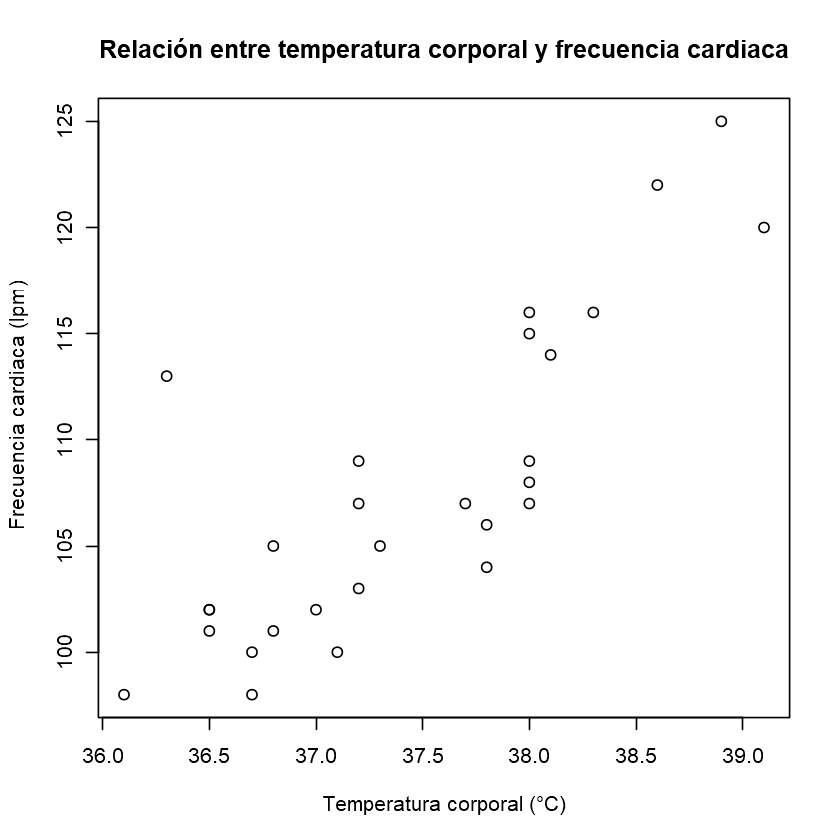

In [9]:
plot(temp_hr$valuenum.x, temp_hr$valuenum.y,
     main="Relación entre temperatura corporal y frecuencia cardiaca",
     xlab="Temperatura corporal (°C)",
     ylab="Frecuencia cardiaca (lpm)"
    )

Para poder realizar una regresión lineal debemos verificar la normalidad de los datos.

In [10]:
shapiro.test(temp_hr$valuenum.x) # Con la prueba Shapiro-Wilk podemos verificar la normalidad de los datos


	Shapiro-Wilk normality test

data:  temp_hr$valuenum.x
W = 0.95939, p-value = 0.3372


In [11]:
shapiro.test(temp_hr$valuenum.y)


	Shapiro-Wilk normality test

data:  temp_hr$valuenum.y
W = 0.9264, p-value = 0.05005


Implicitamente estalecemos un umbral de significancia estadística de 0.05, si el p_value la prueba Shapiro-Wilk es mayor a nuestro umbral de significancia, los datos se distribuyen normal.

La función `lm()` recibe una fórmula de datos para ajustar una linea de la forma

$y = pendiente * x + intercepto$

In [12]:
model = lm(
    formula = temp_hr$valuenum.y ~ temp_hr$valuenum.x # Estamos ajustando una curva donde x es la temperatura corporal
                                                      # y y es la frecuencia cardiaca
)

Con la función `summary()` podemos obtener los parámetros ajustados de la regesión lineal, las significancias estadísticas y el nivel de ajuste de la curva.

In [13]:
summary(model)


Call:
lm(formula = temp_hr$valuenum.y ~ temp_hr$valuenum.x)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.3907 -2.8907  0.0983  1.9287 13.7768 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)        -171.030     39.217  -4.361 0.000181 ***
temp_hr$valuenum.x    7.445      1.047   7.108 1.51e-07 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 4.377 on 26 degrees of freedom
Multiple R-squared:  0.6603,	Adjusted R-squared:  0.6472 
F-statistic: 50.53 on 1 and 26 DF,  p-value: 1.506e-07


Con estos datos podemos interpretar que por cada unidad de temperatura, la frecuencia cardiaca aumenta en 7.445 unidades. Acá puedes encontrar la explicación de cada uno de los elementos desplegados https://feliperego.github.io/blog/2015/10/23/Interpreting-Model-Output-In-R .

Para visualizar la curva ajustada podemos utilizar la función abline() para graficarla.

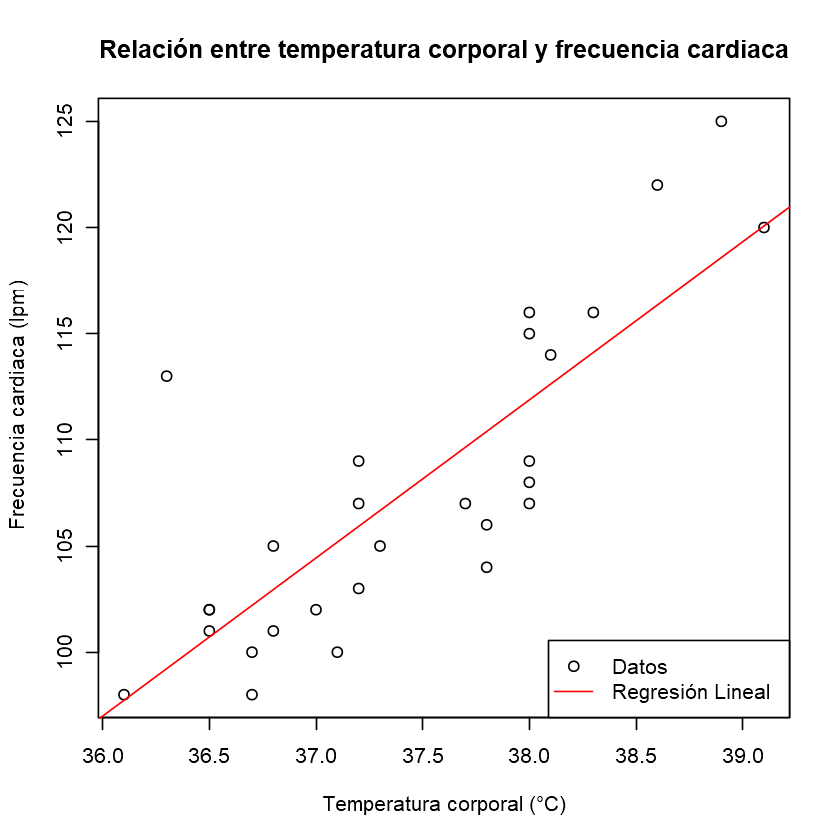

In [14]:
plot(temp_hr$valuenum.x, temp_hr$valuenum.y,
     main="Relación entre temperatura corporal y frecuencia cardiaca",
     xlab="Temperatura corporal (°C)",
     ylab="Frecuencia cardiaca (lpm)"
    )
abline(model, col = "red") # Graficamos el modelo ajustado en color rojo.
legend("bottomright",
       legend = c("Datos", "Regresión Lineal"),
       col=c("black","red"),
       pch = c(1, NA), # Tipo de punto para la leyenda
       lty=c(NA,1) # Tipo de línea para la leyenda
      )

## Relación entre una variable continua y discreta

Extraemos los estados de dolor de los pacientes. Esta variables es dicotómica.

In [15]:
pain_id = 225113
pain = chartevents[chartevents$itemid == pain_id,]
pain$charttime = as.POSIXct(pain$charttime)
pain$valuenum = as.logical(pain$valuenum) # Convertimos la columna a LOGICAL
head(pain)

,row_id,subject_id,hadm_id,icustay_id,itemid,charttime,storetime,cgid,value,valuenum,valueuom,warning,error,resultstatus,stopped
477653,256431528,40124,146893,269173,225113,2130-08-12 11:31:00,2130-08-12 16:20:00,14953,0,FALSE,,0,0,,
477691,256431566,40124,146893,269173,225113,2130-08-12 16:44:00,2130-08-12 16:44:00,14953,0,FALSE,,0,0,,
477939,256434256,40177,198480,236120,225113,2169-05-07 03:42:00,2169-05-07 03:45:00,17250,1,TRUE,,0,0,,
477952,256434269,40177,198480,236120,225113,2169-05-07 03:47:00,2169-05-07 03:47:00,17250,1,TRUE,,0,0,,
478021,256434338,40177,198480,285750,225113,2169-05-12 02:18:00,2169-05-12 02:18:00,19891,1,TRUE,,0,0,,
478038,256434355,40177,198480,285750,225113,2169-05-12 02:20:00,2169-05-12 02:28:00,19891,0,FALSE,,0,0,,


Creamos una columna que contenga sólo la fecha de las obsevaciones con la función `as.Date()`.

In [16]:
pain$date = as.Date(pain$charttime)
hr$date = as.Date(hr$charttime)

`R` no tiene una función nativa para calcular la moda de un vector, por lo que la debemos programar.

In [17]:
getmode = function(v) {
    uniqv = unique(v) # Extraemos los valores únicos del vector v
    matchv = match(v, uniqv) # Extraemos las posiciones de la aparición de los valores del vector v en uniqv
    tabulatedv = tabulate(matchv) # Guardamos la frecuencia de cada uno de los valores del vector matchv
    maxv = which.max(tabulatedv) # Retornamos la posición del valor mayor frecuente del vector tabulatedv, si hay más de 1, devolvemos el primero
    uniqv[maxv] # Retornamos el valor en la posición maxv desde el vector uniqv
}

Necesitamos obtener si en general en un día específico, un paciente específico sintió dolor o no, para eso primero debemos agrupar los datos de acuerdo a la fecha de observación y el código del paciente, al agrupar los datos con esas columnas debemos agregar los valores de las observaciones, para eso utilizaremos la moda, por ejemplo, si un paciente declaró sentir dolor 3 veces en el día y declaró no sentir dolor 2 veces al día, el resultado de la agregación de los valores de ese día es que sí sintió dolor.

Para realizar este procedimiento utilizamos la función de `r` llamada `aggregate()`, la cual recibe la fórmula de agrupamiento y agregación, los datos que deseamos agregar y la función de agregación que deseamos aplicar.

In [18]:
pain_aggregated = aggregate(valuenum ~ date+subject_id, # Agregaremos la columna de dolor agrupando por la fecha de observación y código del paciente
                            pain, # Agregaremos el data frame de observaciones de dolor
                            getmode # Agregaremos los valores usando la moda
                           )
head(pain_aggregated)

date,subject_id,valuenum
2130-08-12,40124,FALSE
2169-05-07,40177,TRUE
2169-05-12,40177,FALSE
2151-08-13,40277,FALSE
2193-10-16,40286,TRUE
2186-07-07,40503,FALSE


Haremos el mismo proceso de agregación con los datos de frecuencia cardiaca del día, pero esta vez agregaremos los datos utilizando la mediana.

In [19]:
hr_aggregated = aggregate(valuenum ~ date+subject_id, # Agregaremos la columna de frecuencia cardiaca agrupando por la fecha de observación y código del paciente
                          hr, # Agregaremos el data frame de observaciones de frecuencia cardiaca
                          median # Agregaremos los valores usando la mediana
                         )
head(hr_aggregated)

date,subject_id,valuenum
2130-02-04,40124,89.5
2130-02-05,40124,88.0
2130-02-06,40124,88.0
2130-08-12,40124,103.0
2130-08-13,40124,106.0
2130-08-14,40124,101.0


Unimos las observaciones agregadas utilizando el método enunciado más atrás

In [20]:
pain_hr = merge(x = pain_aggregated, y = hr_aggregated, by = c("subject_id", "date"))
head(pain_hr)

subject_id,date,valuenum.x,valuenum.y
40124,2130-08-12,FALSE,103.0
40177,2169-05-07,TRUE,67.0
40177,2169-05-12,FALSE,63.0
40277,2151-08-13,FALSE,83.0
40286,2193-10-16,TRUE,113.0
40503,2186-07-07,FALSE,61.5


Exploramos la posible diferencia en las medianas de la frecuencia cardiaca en cada grupo utilizando un boxplot.

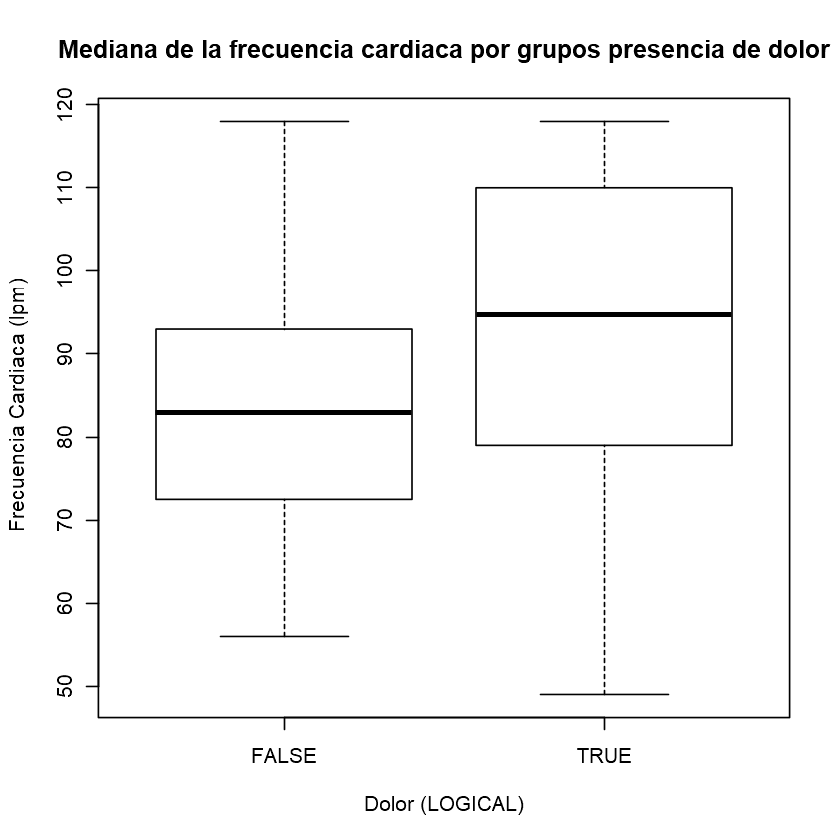

In [21]:
boxplot(formula=valuenum.y~valuenum.x, 
        data=pain_hr,
        main="Mediana de la frecuencia cardiaca por grupos presencia de dolor",
        ylab="Frecuencia Cardiaca (lpm)",
        xlab="Dolor (LOGICAL)"
       )

Gráficamente podemos observar que existe una media mayor de frecuencia cardiaca en el grupo de pacientes con dolor.

Para poder saber si la diferencia entre las medias es estadísticamente significativa en ambos grupos, podemos aplicar la prueba t de Student con la función de `R` `t.test()`.

La función `t.test()` recibe la formula de agrupamiento de los datos y el data frame que agruparemos.

In [22]:
t.test(formula=valuenum.y~valuenum.x, # Agrupamos la frecuencia cardiaca dado el estado de dolor
        data=pain_hr # Usamos el data frame de dolor y frecuencia cardiaca
      )


	Welch Two Sample t-test

data:  valuenum.y by valuenum.x
t = -1.0903, df = 23.057, p-value = 0.2868
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -20.463634   6.336304
sample estimates:
mean in group FALSE  mean in group TRUE 
           84.04348            91.10714 


Según el resultado de la prueba estadística, no existen diferencias entre las medias de frecuencia cardiaca de los grupos de dolor.

## Relación ente variables discretas

Importamos la tabla `PATIENTS` que contiene las variables asociadas a cada paciente de la base de datos.

In [23]:
patients = read.csv("data/PATIENTS.csv")

Importamos la tabla `DIAGNOSES_ICD` que contiene los diagnósticos asociados a cada admisión a la Unidad de Paciente Crítico.

In [24]:
diagnoses = read.csv("data/DIAGNOSES_ICD.csv")

Una admisión a la Unidad de Paciente Crítico tiene asociado uno o más diagnósticos, por lo que necesitamos crear una función que dado una lista de diagnósticos nos retorne si el diagnóstico de nuestro interes se presenta en la lista.

Elegimos el diagnóstico con el código `CIE-9 5849` que equivale a `Acute kidney failure, unspecified`.

In [25]:
getdis <- function(v) {
   5849 %in% v # Retornamos TRUE si el diagnóstico 5489 está en el vector v
}

In [26]:
dis = aggregate(icd9_code ~ hadm_id+subject_id, diagnoses, getdis) # Agrupamos los datos por paciente y admisión y 
                                                                   # agregamos los diagnósticos utilizando 
                                                                   # la función programada anteriormente.
dis = setNames(dis,c("hadm_id","subject_id","ill")) # Cambiamos los nombres de las columnas
head(dis)

hadm_id,subject_id,ill
142345,10006,FALSE
105331,10011,FALSE
165520,10013,FALSE
199207,10017,FALSE
177759,10019,FALSE
103770,10026,FALSE


El data frame dis contiene la agregación de datos antes descrita y en la columna `ill` reporta si el diagnóstico seleccionado está dentro de la lista de diagnósticos de la admisión específica.

Necesitamos añadir el género del paciente asociado a cada una de las admisiones a la Unidad de Paciente Crítico y para eso utilizamos el atributo gender presente en la tabla `PATIENTS`.

Para unir estas tablas utilizamos la función `merge()`

In [27]:
dis_gender = merge(x = dis[c("hadm_id","subject_id","ill")], y = patients[c("subject_id","gender")], 
                   by = c("subject_id")                  
                  )
head(dis_gender)

subject_id,hadm_id,ill,gender
10006,142345,FALSE,F
10011,105331,FALSE,F
10013,165520,FALSE,F
10017,199207,FALSE,F
10019,177759,FALSE,M
10026,103770,FALSE,F


Para comparar la proporción de admisiones de pacientes que presentan la enfermedad agrupando por el género del paciente debemos generar una tabla de contingencia a través de la función `table()`.

In [28]:
contingency_table = table(dis_gender$gender, dis_gender$ill) # Tabla de contingencia de presencia de enfermedad y género
contingency_table

   
    FALSE TRUE
  F    46   13
  M    38   32

Para verificar si las diferencias en las proporciones de ambos géneros son estadísticamente significativas utilizaremos la función `fisher.test()`, la cual recibe la tabla de contingencia.

In [29]:
fisher.test(contingency_table)


	Fisher's Exact Test for Count Data

data:  contingency_table
p-value = 0.00563
alternative hypothesis: true odds ratio is not equal to 1
95 percent confidence interval:
 1.293204 7.054562
sample estimates:
odds ratio 
  2.954226 


Al interpretar el resultado de la prueba estadística podemos concluir que sí existen diferencias estadísticamente significativas entre los grupos.

Convertimos la tabla de contingencia hacia una tabla de proporciones normalizada por fila con la función `prop.table()`.

In [30]:
prop.table(contingency_table,1) # Tabla de proporciones normalizada por fila (1)

   
        FALSE      TRUE
  F 0.7796610 0.2203390
  M 0.5428571 0.4571429

Los admisiones de pacientes de género masculino presentan más `Acute kidney failure, unspecified` que las admisiones de pacientes de género femenino.